In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('Combined_songs - Combined_songs.csv')

In [3]:
df.shape

(142554, 19)

In [4]:
# dropping the unnecessary columns: type, id, uri, track_href, analysis_url, duration_ms, and time_signature (they are mostly
# 4 anyways, so we dont need time_signature):
columns_to_drop = ['type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature']
df = df.drop(columns=columns_to_drop)

# verifying
print(df.columns)

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'MBTI'],
      dtype='object')


In [5]:
df['E_I'] = df['MBTI'].apply(lambda x: 'E' if x[0] == 'E' else 'I')
df['S_N'] = df['MBTI'].apply(lambda x: 'S' if x[1] == 'S' else 'N')
df['T_F'] = df['MBTI'].apply(lambda x: 'T' if x[2] == 'T' else 'F')
df['J_P'] = df['MBTI'].apply(lambda x: 'J' if x[3] == 'J' else 'P')
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,MBTI,E_I,S_N,T_F,J_P
0,0.487,0.716,5,-6.294,1,0.0348,0.00873,0.000203,0.1340,0.5940,104.980,ENFJ,E,N,F,J
1,0.560,0.936,3,-5.835,1,0.0439,0.00847,0.000000,0.1610,0.3710,112.960,ENFJ,E,N,F,J
2,0.494,0.632,5,-6.890,1,0.0342,0.68200,0.000000,0.0869,0.0797,147.873,ENFJ,E,N,F,J
3,0.574,0.555,6,-6.478,0,0.0357,0.24400,0.000011,0.2530,0.5720,159.192,ENFJ,E,N,F,J
4,0.537,0.863,7,-4.460,1,0.0446,0.00201,0.000000,0.2010,0.4840,97.020,ENFJ,E,N,F,J
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142549,0.663,0.660,0,-7.802,1,0.0501,0.59600,0.001560,0.3310,0.4830,142.009,ISTP,I,S,T,P
142550,0.676,0.747,4,-4.639,0,0.0342,0.17700,0.000000,0.2210,0.4490,106.021,ISTP,I,S,T,P
142551,0.363,0.678,2,-4.939,0,0.0995,0.02990,0.000000,0.3240,0.3210,162.124,ISTP,I,S,T,P
142552,0.463,0.973,9,-4.069,1,0.1660,0.02300,0.080800,0.2800,0.4310,144.076,ISTP,I,S,T,P


In [6]:
# converting the categorical columns to numeric values in order to use with k means clustering
mbti_mapping = {
    'E': 1, 'I': 0,  # E/I
    'S': 1, 'N': 0,  # S/N
    'T': 1, 'F': 0,  # T/F
    'J': 1, 'P': 0   # J/P
}

df['E_I'] = df['E_I'].map(mbti_mapping)
df['S_N'] = df['S_N'].map(mbti_mapping)
df['T_F'] = df['T_F'].map(mbti_mapping)
df['J_P'] = df['J_P'].map(mbti_mapping)
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,MBTI,E_I,S_N,T_F,J_P
0,0.487,0.716,5,-6.294,1,0.0348,0.00873,0.000203,0.1340,0.5940,104.980,ENFJ,1,0,0,1
1,0.560,0.936,3,-5.835,1,0.0439,0.00847,0.000000,0.1610,0.3710,112.960,ENFJ,1,0,0,1
2,0.494,0.632,5,-6.890,1,0.0342,0.68200,0.000000,0.0869,0.0797,147.873,ENFJ,1,0,0,1
3,0.574,0.555,6,-6.478,0,0.0357,0.24400,0.000011,0.2530,0.5720,159.192,ENFJ,1,0,0,1
4,0.537,0.863,7,-4.460,1,0.0446,0.00201,0.000000,0.2010,0.4840,97.020,ENFJ,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142549,0.663,0.660,0,-7.802,1,0.0501,0.59600,0.001560,0.3310,0.4830,142.009,ISTP,0,1,1,0
142550,0.676,0.747,4,-4.639,0,0.0342,0.17700,0.000000,0.2210,0.4490,106.021,ISTP,0,1,1,0
142551,0.363,0.678,2,-4.939,0,0.0995,0.02990,0.000000,0.3240,0.3210,162.124,ISTP,0,1,1,0
142552,0.463,0.973,9,-4.069,1,0.1660,0.02300,0.080800,0.2800,0.4310,144.076,ISTP,0,1,1,0


<Axes: xlabel='danceability', ylabel='valence'>

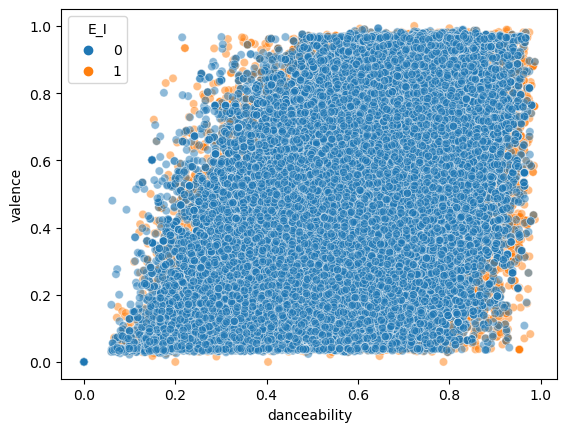

In [7]:
sns.scatterplot(data=df, x='danceability', y='valence', hue='E_I', alpha=0.5)

In [8]:
ei_model = smf.ols("E_I ~ danceability + energy + key + loudness + mode + speechiness + acousticness + instrumentalness +liveness + valence + tempo", data=df).fit()
ei_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    E_I   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     486.9
Date:                Sun, 17 Nov 2024   Prob (F-statistic):               0.00
Time:                        13:02:59   Log-Likelihood:            -1.0067e+05
No. Observations:              142554   AIC:                         2.014e+05
Df Residuals:                  142542   BIC:                         2.015e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2121      0.014     14.950      0.000       0.184       0.240
danceability         0.2441      0.010     24.809      0.000       0.225       0.263
energy               0.1135      0.012      9.699      0.000       0.091       0.136
key              -8.615e-05      0.000     -0.235      0.814      -0.001       0.001
loudness            -0.0013      0.001     -2.348      0.019      -0.002      -0.000
mode                -0.0108      0.003     -3.973      0.000      -0.016      -0.005
speechiness          0.2985      0.016     19.192      0.000       0.268       0.329
acousticness        -0.1038      0.006    -16.686      0.000      -0.116      -0.092
instrumentalness    -0.0668      0.006    -10.702      0.000      -0.079      -0.055
liveness             0.0232      0.009      2.449      0.014       0.005       0.042
valence              0.0893      0.007     13.036      0.000       0.076       0.103
tempo             6.683e-05   4.61e-05      1.450      0.147   -2.35e-05       0.000
==============================================================================
Omnibus:                   535572.246   Durbin-Watson:                   0.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20481.075
Skew:                           0.086   Prob(JB):                         0.00
Kurtosis:                       1.151   Cond. No.                     1.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
sn_model = smf.ols("S_N ~ danceability + energy + key + loudness + mode + speechiness + acousticness + instrumentalness +liveness + valence + tempo", data=df).fit()
sn_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    S_N   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     71.84
Date:                Sun, 17 Nov 2024   Prob (F-statistic):          6.95e-162
Time:                        13:02:59   Log-Likelihood:            -1.0061e+05
No. Observations:              142554   AIC:                         2.012e+05
Df Residuals:                  142542   BIC:                         2.014e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3694      0.014     26.044      0.000       0.342       0.397
danceability         0.0366      0.010      3.723      0.000       0.017       0.056
energy               0.0048      0.012      0.411      0.681      -0.018       0.028
key                  0.0009      0.000      2.464      0.014       0.000       0.002
loudness             0.0029      0.001      5.123      0.000       0.002       0.004
mode                 0.0076      0.003      2.801      0.005       0.002       0.013
speechiness          0.0703      0.016      4.522      0.000       0.040       0.101
acousticness        -0.0014      0.006     -0.224      0.823      -0.014       0.011
instrumentalness    -0.0758      0.006    -12.156      0.000      -0.088      -0.064
liveness            -0.0078      0.009     -0.826      0.409      -0.026       0.011
valence              0.0593      0.007      8.656      0.000       0.046       0.073
tempo             5.744e-06   4.61e-05      0.125      0.901   -8.45e-05     9.6e-05
==============================================================================
Omnibus:                   541956.418   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23385.124
Skew:                           0.371   Prob(JB):                         0.00
Kurtosis:                       1.160   Cond. No.                     1.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
tf_model = smf.ols("T_F ~ danceability + energy + key + loudness + mode + speechiness + acousticness + instrumentalness +liveness + valence + tempo", data=df).fit()
tf_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    T_F   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     472.7
Date:                Sun, 17 Nov 2024   Prob (F-statistic):               0.00
Time:                        13:02:59   Log-Likelihood:            -1.0082e+05
No. Observations:              142554   AIC:                         2.017e+05
Df Residuals:                  142542   BIC:                         2.018e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2675      0.014     18.831      0.000       0.240       0.295
danceability         0.0623      0.010      6.328      0.000       0.043       0.082
energy               0.2398      0.012     20.479      0.000       0.217       0.263
key                 -0.0005      0.000     -1.428      0.153      -0.001       0.000
loudness            -0.0104      0.001    -18.192      0.000      -0.012      -0.009
mode                -0.0616      0.003    -22.732      0.000      -0.067      -0.056
speechiness          0.5132      0.016     32.959      0.000       0.483       0.544
acousticness        -0.1456      0.006    -23.380      0.000      -0.158      -0.133
instrumentalness     0.1139      0.006     18.234      0.000       0.102       0.126
liveness             0.0588      0.009      6.203      0.000       0.040       0.077
valence             -0.0927      0.007    -13.518      0.000      -0.106      -0.079
tempo             9.564e-05   4.61e-05      2.074      0.038    5.24e-06       0.000
==============================================================================
Omnibus:                   532009.479   Durbin-Watson:                   0.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20598.701
Skew:                           0.065   Prob(JB):                         0.00
Kurtosis:                       1.142   Cond. No.                     1.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
jp_model = smf.ols("J_P ~ danceability + energy + key + loudness + mode + speechiness + acousticness + instrumentalness +liveness + valence + tempo", data=df).fit()
jp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    J_P   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     110.2
Date:                Sun, 17 Nov 2024   Prob (F-statistic):          3.64e-252
Time:                        13:03:00   Log-Likelihood:            -1.0203e+05
No. Observations:              142554   AIC:                         2.041e+05
Df Residuals:                  142542   BIC:                         2.042e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.5651      0.014     39.447      0.000       0.537       0.593
danceability        -0.0738      0.010     -7.429      0.000      -0.093      -0.054
energy              -0.0836      0.012     -7.081      0.000      -0.107      -0.060
key                  0.0001      0.000      0.330      0.742      -0.001       0.001
loudness             0.0002      0.001      0.349      0.727      -0.001       0.001
mode                 0.0089      0.003      3.264      0.001       0.004       0.014
speechiness         -0.1318      0.016     -8.392      0.000      -0.163      -0.101
acousticness         0.0386      0.006      6.144      0.000       0.026       0.051
instrumentalness     0.0229      0.006      3.640      0.000       0.011       0.035
liveness            -0.0163      0.010     -1.710      0.087      -0.035       0.002
valence             -0.0533      0.007     -7.705      0.000      -0.067      -0.040
tempo            -8.186e-06   4.65e-05     -0.176      0.860   -9.94e-05     8.3e-05
==============================================================================
Omnibus:                   510801.030   Durbin-Watson:                   0.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22985.473
Skew:                           0.215   Prob(JB):                         0.00
Kurtosis:                       1.080   Cond. No.                     1.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
df['MBTI'].value_counts()

MBTI
INFP    12099
ENFP    11631
INFJ    11498
ESTP    11352
ENFJ    11076
INTJ    10715
INTP     9618
ENTP     9120
ISTP     8862
ENTJ     8656
ISFP     8490
ESFP     7788
ISFJ     7349
ISTJ     6041
ESTJ     4441
ESFJ     3818
Name: count, dtype: int64

In [13]:
mbti_e = df[df['MBTI'].str.contains('E')]
mbti_e['MBTI'].value_counts()

MBTI
ENFP    11631
ESTP    11352
ENFJ    11076
ENTP     9120
ENTJ     8656
ESFP     7788
ESTJ     4441
ESFJ     3818
Name: count, dtype: int64

In [14]:
mbti_i = df[df['MBTI'].str.contains('I')]
mbti_i['MBTI'].value_counts()

MBTI
INFP    12099
INFJ    11498
INTJ    10715
INTP     9618
ISTP     8862
ISFP     8490
ISFJ     7349
ISTJ     6041
Name: count, dtype: int64

In [15]:
mbti_n = df[df['MBTI'].str.contains('N')]
mbti_n['MBTI'].value_counts()

MBTI
INFP    12099
ENFP    11631
INFJ    11498
ENFJ    11076
INTJ    10715
INTP     9618
ENTP     9120
ENTJ     8656
Name: count, dtype: int64

In [16]:
mbti_s = df[df['MBTI'].str.contains('S')]
mbti_s['MBTI'].value_counts()

MBTI
ESTP    11352
ISTP     8862
ISFP     8490
ESFP     7788
ISFJ     7349
ISTJ     6041
ESTJ     4441
ESFJ     3818
Name: count, dtype: int64

In [17]:
mbti_f = df[df['MBTI'].str.contains('F')]
mbti_f['MBTI'].value_counts()

MBTI
INFP    12099
ENFP    11631
INFJ    11498
ENFJ    11076
ISFP     8490
ESFP     7788
ISFJ     7349
ESFJ     3818
Name: count, dtype: int64

In [18]:
mbti_t = df[df['MBTI'].str.contains('T')]
mbti_t['MBTI'].value_counts()

MBTI
ESTP    11352
INTJ    10715
INTP     9618
ENTP     9120
ISTP     8862
ENTJ     8656
ISTJ     6041
ESTJ     4441
Name: count, dtype: int64

In [19]:
mbti_j = df[df['MBTI'].str.contains('J')]
mbti_j['MBTI'].value_counts()

MBTI
INFJ    11498
ENFJ    11076
INTJ    10715
ENTJ     8656
ISFJ     7349
ISTJ     6041
ESTJ     4441
ESFJ     3818
Name: count, dtype: int64

In [20]:
mbti_p = df[df['MBTI'].str.contains('P')]
mbti_p['MBTI'].value_counts()

MBTI
INFP    12099
ENFP    11631
ESTP    11352
INTP     9618
ENTP     9120
ISTP     8862
ISFP     8490
ESFP     7788
Name: count, dtype: int64